In [1]:
import nugridse as mp
import utils as u
from numpy import *


# initializing cases. Edit the path accordingly to where they sit in your machine
# read_nova_model.py

case_nova = []

nova_co=mp.se('H5_out_co_1.15_20_X_700_mixed/','out.h5')
case_nova.append(nova_co)

# initialization only with the first model
delta_mass_nova = []
cycle_ar = []
mass_cut_ar = []
mass_limit_ar = []
E_i_nova_decay = []
E_i_nova_nodecay = []

cycle = 600
mass_cut = 1.150000 # this need to be done better
mass_limit = nova_co.se.get(cycle,'mass')[len(nova_co.se.get(cycle,'mass'))-1]
nova_co.average_iso_abund_marco([mass_cut,mass_limit],cycle,True,2)
E_i_nova_decay.append(array(mp.average_mass_frac_decay)*(mass_limit-mass_cut))
E_i_nova_nodecay.append(array(mp.average_mass_frac)*(mass_limit-mass_cut))

delta_mass_nova.append(mass_limit - mass_cut)
cycle_ar.append(cycle)
mass_cut_ar.append(mass_cut)
mass_limit_ar.append(mass_limit)




nova_one=mp.se('H5_out_ne_1.3_20_X_500_mixed','out.h5')
case_nova.append(nova_one)


cycle=400
mass_cut = 1.30000 # this need to be done better
mass_limit = nova_one.se.get(cycle,'mass')[len(nova_one.se.get(cycle,'mass'))-1]
nova_one.average_iso_abund_marco([mass_cut,mass_limit],cycle,True,2)
E_i_nova_decay.append(array(mp.average_mass_frac_decay)*(mass_limit-mass_cut))
E_i_nova_nodecay.append(array(mp.average_mass_frac)*(mass_limit-mass_cut))

delta_mass_nova.append(mass_limit - mass_cut)
cycle_ar.append(cycle)
mass_cut_ar.append(mass_cut)
mass_limit_ar.append(mass_limit)


# if you add a new model, need to do use the template below
#
#nova_model=mp.se('H5_out_whatever','out.h5')
#case_nova.append(nova_model)
#
#
#cycle= the last I guess, but does not have to be always the case
#mass_cut = 1.30000 # this need to be done better
#mass_limit = nova_model.se.get(cycle,'mass')[len(nova_model.se.get(cycle,'mass'))-1]
#nova_model.average_iso_abund_marco([mass_cut,mass_limit],cycle,True,2)
#E_i_nova_decay.append(array(mp.average_mass_frac_decay)*(mass_limit-mass_cut))
#E_i_nova_nodecay.append(array(mp.average_mass_frac)*(mass_limit-mass_cut))
#
#delta_mass_nova.append(mass_limit - mass_cut)
#cycle_ar.append(cycle)
#mass_cut_ar.append(mass_cut)
#mass_limit_ar.append(mass_limit)


Searching files, please wait.......
Reading preprocessor files
File search complete.
 reading ['mass']...100%Using The following conditions:
	mass_range: 1.15 1.1500143685
	cycle: 600
 reading ['iso_massf']...100%average over used_masses range, not over original mass_range
1.15000020899 1.1500143685 instead of 1.15 1.1500143685
departure from 1 of sum of average_mass_frac= 0.000783207404049
departure from 1 of sum of average_mass_frac_decay= 0.000783207409241
Searching files, please wait.......
Reading preprocessor files
File search complete.
 reading ['mass']...100%Using The following conditions:
	mass_range: 1.3 1.30001008562
	cycle: 400
 reading ['iso_massf']...100%average over used_masses range, not over original mass_range
1.30000000629 1.30001008562 instead of 1.3 1.30001008562
departure from 1 of sum of average_mass_frac= 0.000783294503114
departure from 1 of sum of average_mass_frac_decay= 0.000783321254359


In [4]:
# you should not need to change this: initializing indexing
# define_back_ind.py

index_stable=[]
name_stable =[]
isotopes_dum=case_nova[0].se.isotopes

isotope_names=case_nova[0].se.isotopes
u.convert_specie_naming_from_h5_to_ppn(isotope_names)
isotope_names = u.spe


kk=0
for i in isotope_names:
    for j in u.stable:
        if i == j.capitalize():
            index_stable.append(kk)
            name_stable.append(isotopes_dum[kk])
            break
    kk=kk+1

back_ind_to_all={}
for a,b in zip(u.stable,index_stable):
            back_ind_to_all[a] = b


back_ind = u.back_ind

In [5]:
# more indexing. Possibly some of this stuff is redundant
# assign_index_for_stables.py

ind_specie=[]
specie_label=[]
for i in range(len(u.stable)):
    specie_to_plot = u.stable[i]
    # label needed to do the plot
    specie_label.append(name_stable[i])
    # find now index correct
    ind_specie.append(back_ind[specie_to_plot])	

In [6]:
# create abundance array for ejected abundances (solar mass units) no need to change this
# create_abundance_array_for_table.py

tab_nova=[]
for ii in range(len(E_i_nova_decay)):
    dum = []
    for i in range(len(u.stable)):
        dum.append(E_i_nova_decay[ii][ind_specie[i]])
    tab_nova.append(dum) 

In [7]:
# calculate solar isotopic and element composition integrated over the same mass range. No need to change this.
# calculate_initial_mass_per_specie.py


# reading solar... this file should be specified elsewhere. You get the reference solar data from here!
solar_factor = 2.
u.solar('iniab1.0E-02.ppn_GN93',solar_factor)

stable_lower = []
for i in u.stable:
    stable_lower.append(i.lower())

ini_abund_sol_mass_unit=[]
j = 0
for i in case_nova:
    dum = []
    for ii in stable_lower:
        dum.append(u.solar_abundance[ii]*delta_mass_nova[j])
    ini_abund_sol_mass_unit.append(dum)
    j=j+1


stable_capitalize=[]
for i in u.stable:
        stable_capitalize.append(i.capitalize())

ini_element_sol_mass_unit=[]
#
u.give_zip_element_z_and_names(stable_capitalize)
z_of_element_name = []
z_of_element_name=u.z_for_elem

j=0
for c in case_nova:
    dum_element_abundance=[]
    for jj in z_of_element_name:
        dummy=0.
        for i in range(len(u.stable)):
            if jj == u.index_atomic_number[u.stable[i].capitalize()]:
                dummy=dummy+float(ini_abund_sol_mass_unit[j][ind_specie[i]])
        if dummy > 1.0e-60:
            dum_element_abundance.append(dummy)
    ini_element_sol_mass_unit.append(dum_element_abundance)
    j=j+1


In [8]:
# create production factors for isotopes, No need to change this
# create_production_factor_array_isotopes.py

# here I calculate production factors starting from 
# ejected/lost by mass loss material. 

print ('I have',len(case_nova),'models:')
print (case_nova)

total_production_factors_nova = []
for ii in range(len(E_i_nova_decay)):
    dum = []
    for i in range(len(u.stable)):
        dum.append(E_i_nova_decay[ii][ind_specie[i]]/ini_abund_sol_mass_unit[ii][ind_specie[i]])
    total_production_factors_nova.append(dum)     

('I have', 2, 'models:')
[<nugridse.se instance at 0xac032f0c>, <nugridse.se instance at 0xabd322ec>]


In [10]:
# create the element abundance distribution (solar mass units). No need to change this
# create_element_abundance_array_for_table.py


stable_capitalize=[]
for i in u.stable:
    stable_capitalize.append(i.capitalize())

element_abundance_nova=[]
u.give_zip_element_z_and_names(stable_capitalize)
z_of_element_name = []
z_of_element_name=u.z_for_elem

j=0
z_I_really_have = []
element_I_really_have = []
for c in case_nova:
    dum_element_abundance=[]
    dumdum_z = []
    k=0
    element_dum = []
    for jj in z_of_element_name:
        dummy=0.
        dum_z = []
        for i in range(len(u.stable)):
            if jj == u.index_atomic_number[u.stable[i].capitalize()]:
                dummy=dummy+float(tab_nova[j][i]) 
                dum_z=jj
        if dum_z:
            dumdum_z.append(jj)
            dum_element_abundance.append(dummy)
            element_dum.append(c.se.elements[k])
        k=k+1
    element_abundance_nova.append(dum_element_abundance)
    z_I_really_have.append(dumdum_z)
    element_I_really_have.append(element_dum)
    j=j+1

In [11]:
# create element production factor. No need  to change here
# create_production_factor_array_elements.py

# here I calculate production factors starting from 
# ejected/lost by mass loss material. 
print 'I have',len(case_nova),'wind masses:'
print case_nova

total_el_production_factors_nova = []
for ii in range(len(element_abundance_nova)):
    dum = []
    for i in range(len(ini_element_sol_mass_unit[0])):
        if ini_element_sol_mass_unit[0][i] > 1.0e-90:
            dum.append(element_abundance_nova[ii][i]/ini_element_sol_mass_unit[ii][i])
    total_el_production_factors_nova.append(dum)

I have 2 wind masses:
[<nugridse.se instance at 0xac032f0c>, <nugridse.se instance at 0xabd322ec>]


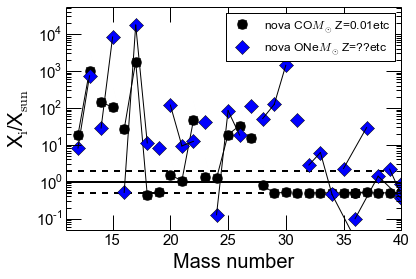

In [21]:
# this is for plotting isotope production factors. This is a bit of a mess. 
# need to edit here directly for labels and stuff on plot, but this should be
# automatically set from the name of the model
# plot_iso_pf_decay_all.py

import matplotlib.pyplot as pl
# need this below if python 2. No need for python 3
% matplotlib inline 


symbol=['ko','bD','r>','ks','m^','k+','b*']

# specify here what models want to plot. This could be done better
array_to_plot=[array(total_production_factors_nova[0]),array(total_production_factors_nova[1])]

mass_label = ['nova CO','nova ONe']
metallicity_label=['Z=0.01','Z=??']#['Z=0.02','Z=0.02','Z=0.02']
more_label=['etc','etc']#[' delay','w78','w78p40']

I_want_iso_text = True
shift_text = 5.
for k in range(len(array_to_plot)):
    for j in range(len(u.stable)):
        if j == 0:
            pl.semilogy(u.amass_int[back_ind_to_all[u.stable[j].upper()]],array_to_plot[k][back_ind[u.stable[j].upper()]],\
            symbol[k],markersize=10.,label=str(mass_label[k])+'$M_{\odot}$ '+str(metallicity_label[k])+''+\
            str(more_label[j]))
            pl.axhline(y=1,linewidth=2, color='k')
            pl.axhline(y=2.,linestyle='--',linewidth=2, color='k')
            pl.axhline(y=0.5,linestyle='--',linewidth=2, color='k')
        else:
            if u.stable[j] != 'BE  9':
                pl.semilogy(u.amass_int[back_ind_to_all[u.stable[j].upper()]],\
                array_to_plot[k][back_ind[u.stable[j].upper()]],symbol[k],markersize=10.)
                # to plot names of species larger than a value,
                # but only beyond some given A.
                #if array_to_plot[k][back_ind_exp[u.stable[j].upper()]] > mg24_array[k]/2. and u.amass_int[back_ind[u.stable[j]]] > 95:
                    #pl.text(u.amass_int[back_ind_wind[u.stable[j].upper()]]-1,1.1*array_to_plot[k][back_ind_exp[u.stable[j].upper()]],u.stable[j].upper(),fontsize=10)
    for i in range(len(u.stable)):
        for j in range(len(u.stable)): 
            if u.stable[i][:2] == u.stable[j][:2]:
                if u.stable[i] == u.stable[j-1]:
                    adum=[u.amass_int[back_ind_to_all[u.stable[i].upper()]],\
                    u.amass_int[back_ind_to_all[u.stable[j].upper()]]]
                    #mfdum =[float(mp.average_mass_frac[mp.cl[mp.stable[i].capitalize()]])/float(mp.solar_abundance[mp.stable[i].lower()]*solar_factor),float(mp.average_mass_frac[mp.cl[mp.stable[j].capitalize()]])/float(mp.solar_abundance[mp.stable[j].lower()]*solar_factor)]
                    mfddum=[array_to_plot[k][back_ind[u.stable[i].upper()]],\
                    array_to_plot[k][back_ind[u.stable[j].upper()]]]
                    pl.semilogy(adum,mfddum,'k-')
                    #try:
                    # pl.plot(adum,mfddum,'k-')
                    #except UnboundLocalError:
                    # print adum  






pl.legend(numpoints=1,loc='upper right')
#pl.grid()

pl.xlabel('Mass number', fontsize=20)
pl.ylabel(r'X$_{\rm i}$/X$_{\rm sun}$', fontsize=20)
# setting here manually limits... can be done better
y_min = 5.0e-2
y_max = 5.5e+4
pl.ylim(y_min,y_max)
pl.xlim(11,40)
#pl.xticks(np.arange(94., 220.+1, 10.0))
#pl.xlim(55,100)
#pl.xticks(np.arange(55., 100.+1, 5.0))


# text & labels
I_want_text = False
if I_want_text:
    down=0.2
    up=  0.3
    delta=0.5
    n_font=13
    #pl.text(57-delta,up,'Fe',fontsize=n_font)
    #pl.text(59-delta,down,'Co',fontsize=n_font)
    #pl.text(63-delta,up,'Ni',fontsize=n_font)
    #pl.text(65-delta,down,'Cu',fontsize=n_font)
    #pl.text(68-delta,up,'Zn',fontsize=n_font)
    #pl.text(71-delta,down,'Ga',fontsize=n_font)
    #pl.text(73-delta,up,'Ge',fontsize=n_font)
    #pl.text(75-delta,down,'As',fontsize=n_font)
    #pl.text(78-delta,up,'Se',fontsize=n_font)
    #pl.text(81-delta,down,'Br',fontsize=n_font)
    #pl.text(84-delta,up,'Kr',fontsize=n_font)
    #pl.text(87-delta,down,'Rb',fontsize=n_font)
    #pl.text(88-delta,up,'Sr',fontsize=n_font)
    #pl.text(89-delta,down,' Y',fontsize=n_font)
    #pl.text(92-delta,up,'Zr',fontsize=n_font)
    #pl.text(93-delta,down,'Nb',fontsize=n_font)
    #pl.text(96-delta,up,'Mo',fontsize=n_font)
    #pl.text(210,o16_array[0]*2.,'$O16*2$',fontsize=n_font)
    #pl.text(97,o16_array[0]/2.,'$O16/2$',fontsize=n_font)
    #pl.text(96,o16_array[0]*1.1,'$O16$',fontsize=n_font)	
    pl.text(205,mg24_array[0]*2.*1.1,'$MG24*2$',fontsize=n_font)
    pl.text(205,mg24_array[0]/2.*1.1,'$MG24/2$',fontsize=n_font)
    pl.text(205,mg24_array[0]*1.1,'$MG24$',fontsize=n_font)   



pl.rc('xtick', labelsize=15) 
pl.rc('ytick', labelsize=15)
#
pl.rcParams['xtick.major.size'] = 15
pl.rcParams['xtick.major.width'] = 1
pl.rcParams['xtick.minor.size'] =  5
pl.rcParams['xtick.minor.width'] = 1
pl.rcParams['ytick.major.size'] = 15
pl.rcParams['ytick.major.width'] = 1
pl.rcParams['ytick.minor.size'] =  5
pl.rcParams['ytick.minor.width'] = 1

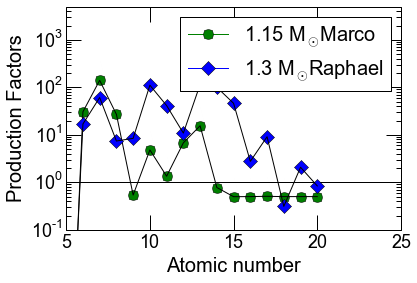

In [23]:
# plot element production factor. This could be cleaned and done better
# plot_el_pf_decay_all.py

from pylab import *
import matplotlib.pyplot as pl
from matplotlib.ticker import MultipleLocator


frebel_xh=[4.06,4.53,3.68,2.37,1.67,1.14,0.23,0.60]
kim_a=[6.,7.,8.,11.,12.,13.,20.,22.]

xticks(fontsize=18)
yticks(fontsize=18)



symbol=['go-','bD-','r>-','ks-','m^-','c<-','b*-','rs-']
array_to_plot=[array(total_el_production_factors_nova[0]),array(total_el_production_factors_nova[1])]
mass_label=['1.15','1.3']
additional_label = [r'Marco',r'Raphael']


pl.axhline(y=1,linewidth=1, color='k')
summary_elem_array = []
z_to_plot = []
for j in range(len(array_to_plot)):
    summary_dum = []
    z_dum = []
    for i in range(len(z_I_really_have[j])):
        if u.index_stable[i] == 1:
            if i==0:
                pl.semilogy(z_I_really_have[j][i],array_to_plot[j][i],symbol[j],markersize=10.,label=str(mass_label[j])+\
                ' M$_{\odot}$'+additional_label[j])
            else:
                pl.semilogy(z_I_really_have[j][i],array_to_plot[j][i],symbol[j],markersize=10.)
            summary_dum.append(array_to_plot[j][i])
            z_dum.append(z_I_really_have[j][i])
    z_to_plot.append(z_dum)
    summary_elem_array.append(summary_dum)
    pl.semilogy(z_to_plot[j],summary_elem_array[j],'k-',lw='1')

pl.legend(numpoints=1,loc='upper right',prop={'size':20})

pl.xlabel(r'Atomic number', fontsize=20)
pl.ylabel(r'Production Factors', fontsize=20)

y_min = 1.0e-1
y_max = 5.e+3#1.0e+4
pl.ylim(y_min,y_max)
#x_min = 25
#x_max = 45 #85
x_min = 5
x_max = 25

pl.xlim(x_min,x_max)

pl.show()

In [24]:
# writing out tables with isotopic yields in solar masses (yields) or production factors
# make_isotopic_table_nova.py

import ascii_table as att

# file name yields
file_name_table_species = 'isotopic_table_yields.txt'
# file name production factors
#file_name_table_species = 'isotopic_table_prodfac.txt'

#
# headers and format
headers=['this is a test','to write strings in the first col']
form_str='%7.3E'
# label columns
#case_label_and_first_column = ['isotopes','1.65 Msun','2 Msun','3 Msun','4 Msun','5 Msun','15 Msun','20 Msun','25 Msun','32 Msun','60 Msun']
# need to edit this according to how many models you are dealing with
case_label_and_first_column = ['isotopes','1.15 Msun','1.3 Msun']

sep_string=' & '

#arguments for isotopic table:
data=[]
# in case of yields table
data=[tab_nova[0],tab_nova[1]]

# in case of production factor table
#data=[total_production_factors_nova[0],total_production_factors_nova[1]]




#
isotopes_for_table = []
isotopes_for_table = u.stable


all_data=[]
all_data.append(isotopes_for_table)
for i in range(len(data)):
    datal=list(form_str%data[i][j] for j in range(len(data[i])))
    all_data.append(datal)


### attempt to add the trailing '\\' to a latex table
final_col=len(isotopes_for_table)*[r'\\ ']
case_label_and_first_column.append(r'\\ ')
all_data.append(final_col)
att.write(file_name_table_species,headers,case_label_and_first_column,all_data,sep=sep_string)

Warning this method will overwrite ./isotopic_table_yields.txt
Would you like to continue? (y)es or (n)no?
--> y
Yes selected
Continuing as normal


In [25]:
# make plot of elemental abundances in solar masses or production factors
# make_elem_table_nova.py

import ascii_table as att

# file name yields
file_name_table_element = 'element_table_yields.txt'
# file name prod factors
#file_name_table_element = 'element_table_prodfac.txt'

# headers and format
headers=['this is a test','to write strings in the first col']
form_str='%7.3E'
# label columns
#case_label_and_first_column = ['specie','1.65 Msun','2 Msun','3 Msun','4 Msun','5 Msun','15 Msun','20 Msun','25 Msun','32 Msun','60 Msun']
case_label_and_first_column = ['specie','1.15 Msun','1.3 Msun']

sep_string=' & '

#arguments for isotopic table:
#specie_label = ['H ', 'He', 'Li', 'Be' , 'B ', 'C ', 'N ', 'O ', 'F ', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P ', 'S ', 'Cl', 'Ar', 'K ', 'Ca', 'Sc', 'Ti', 'V ', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y ', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I ', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W ', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi']
specie_label = element_I_really_have[0]

data=[]
# for yields
data=element_abundance_nova
# for production factors
#data=[total_el_production_factors_nova[0],total_el_production_factors_nova[1]]




all_data=[]
all_data.append(specie_label)
for i in range(len(data)):
    datal=list(form_str%data[i][j] for j in range(len(data[i])))
    all_data.append(datal)


### attempt to add the trailing '\\' to a latex table
final_col=len(specie_label)*[r'\\ ']
case_label_and_first_column.append(r'\\ ')
all_data.append(final_col)
att.write(file_name_table_element,headers,case_label_and_first_column,all_data,sep=sep_string)

Warning this method will overwrite ./element_table_yields.txt
Would you like to continue? (y)es or (n)no?
--> y
Yes selected
Continuing as normal
